In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from src.data_generating_process.domainV2 import DomainGenerator, DomainParameters, RndCensoredVariables
import numpy as np 
from numpy import random as npr

def get_json(path:str):
    with open(path) as fp:
        data = json.load(fp)
    return data

def get_SRCONLY_result(file_path:str):
    return get_json(f'{file_path}/SRCONLY_tuning_results.json')

def get_TGTONLY_result(file_path:str):
    return get_json(f'{file_path}/TGTONLY_tuning_results.json')

def get_folders_in_dir(dir):
    folders = sorted(os.listdir(dir))
    paths = [(f'{dir}/{folder}') for folder in folders]
    return paths

In [18]:
paths = get_folders_in_dir('data/noninductive_transfer/sigma')
src = [get_SRCONLY_result(p) for p in paths]
tgt = [get_TGTONLY_result(p) for p in paths]
src = pd.DataFrame(src)
tgt = pd.DataFrame(tgt)

In [19]:
compare = pd.DataFrame([src.auc_roc, tgt.auc_roc]).T
compare.columns = ['src', 'tgt']
compare

,src,tgt
0,0.212029,0.411437
1,0.831697,0.989148
2,0.789569,0.892157
3,0.781583,0.899305
4,0.464345,0.959866
5,0.543552,0.842341
6,0.776949,0.995789
7,0.508640,0.805127
8,0.825317,0.916547
9,0.636488,0.961515


(0.0, 1.0)

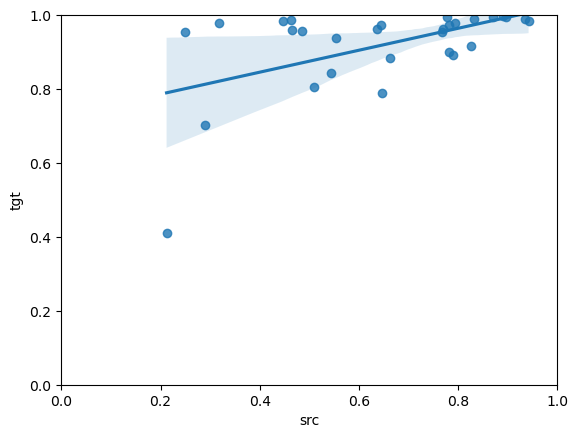

In [22]:
sns.regplot(compare, x='src', y = 'tgt')
plt.xlim(0,1)
plt.ylim(0,1)